# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection 

##  Data is collected from the kaggle. Kaggle dataset link --> https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [2]:
# loading the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# column names
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Features Description

In [6]:
# datatype of the variables
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# basic information about the datset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# checking for the null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# checking for duplicated data
diabetes_dataset.duplicated().sum()

0

# Target feature

In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

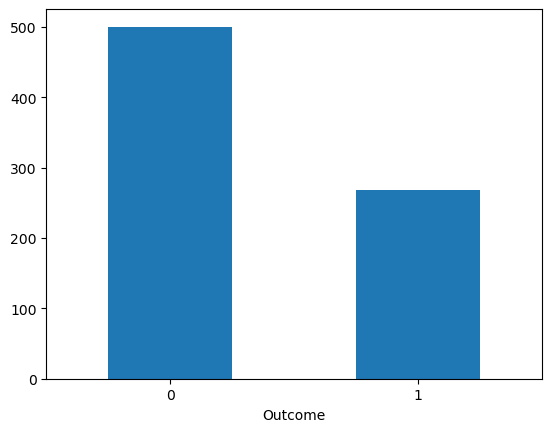

In [12]:
diabetes_dataset['Outcome'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

# Splitting the data into features and target

In [13]:
x = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

# Splitting the dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)

In [16]:
print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [17]:
print(y_train.shape, y_test.shape)

(614,) (154,)


# Handling the imbalanced dataset

In [18]:
# Smote Algorithm
from collections import Counter
counter = Counter(y_train)
print('Before', counter)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, Y_train = sm.fit_resample(x_train, y_train)
  
counter = Counter(Y_train)
print('After', counter)

Before Counter({0: 400, 1: 214})
After Counter({1: 400, 0: 400})


# SVM

In [19]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [20]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7575
Accuracy score of the test data :  0.7532467532467533


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()

In [24]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [25]:
# accuracy score on the training data
X_train_prediction = lr_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = lr_classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.76125
Accuracy score of the test data :  0.7532467532467533


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [27]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

# Model Evaluation

In [28]:
# accuracy score on the training data
X_train_prediction = dt_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = dt_classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.6883116883116883


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [30]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

In [31]:
# accuracy score on the training data
X_train_prediction = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = rf_classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7207792207792207


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [33]:
nb_classifier.fit(X_train, Y_train)

GaussianNB()

# Model Evaluation

In [34]:
# accuracy score on the training data
X_train_prediction = nb_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = nb_classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.75625
Accuracy score of the test data :  0.7077922077922078


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [36]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

# Model Evaluation

In [37]:
# accuracy score on the training data
X_train_prediction = knn_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = knn_classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.86875
Accuracy score of the test data :  0.7142857142857143


# Predictive System

In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
